In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls /content/drive/MyDrive/

 archive.zip  'Colab Notebooks'   consumption_forecast.zip  'Documents '  'photo (1).pdf'


In [ ]:
!cp /content/drive/MyDrive/consumption_forecast.zip /content/


In [ ]:
!ls /content/


consumption_forecast.zip  drive  sample_data


In [ ]:
!unzip /content/consumption_forecast.zip -d /content/Dataset/


Archive:  /content/consumption_forecast.zip
  inflating: /content/Dataset/AEP_hourly.csv  
  inflating: /content/Dataset/COMED_hourly.csv  
  inflating: /content/Dataset/DAYTON_hourly.csv  
  inflating: /content/Dataset/DEOK_hourly.csv  
  inflating: /content/Dataset/DOM_hourly.csv  
  inflating: /content/Dataset/DUQ_hourly.csv  
  inflating: /content/Dataset/EKPC_hourly.csv  
  inflating: /content/Dataset/FE_hourly.csv  
  inflating: /content/Dataset/NI_hourly.csv  
  inflating: /content/Dataset/PJME_hourly.csv  
  inflating: /content/Dataset/PJMW_hourly.csv  
  inflating: /content/Dataset/PJM_Load_hourly.csv  
  inflating: /content/Dataset/est_hourly.paruqet  
  inflating: /content/Dataset/pjm_hourly_est.csv  


In [ ]:
!ls /content/Dataset/

AEP_hourly.csv	   DEOK_hourly.csv  EKPC_hourly.csv	NI_hourly.csv	    PJM_Load_hourly.csv
COMED_hourly.csv   DOM_hourly.csv   est_hourly.paruqet	PJME_hourly.csv     PJMW_hourly.csv
DAYTON_hourly.csv  DUQ_hourly.csv   FE_hourly.csv	pjm_hourly_est.csv


In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/Dataset/AEP_hourly.csv'  # Adjust this to your chosen file
data = pd.read_csv(file_path)

# Display the first few rows
data.head()


,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


In [ ]:
# Check the shape and data types
print(data.shape)
print(data.info())

# Check for missing values
print(data.isnull().sum())

# Display summary statistics
print(data.describe())


(121273, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  121273 non-null  object 
 1   AEP_MW    121273 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.9+ MB
None
Datetime    0
AEP_MW      0
dtype: int64
              AEP_MW
count  121273.000000
mean    15499.513717
std      2591.399065
min      9581.000000
25%     13630.000000
50%     15310.000000
75%     17200.000000
max     25695.000000


In [ ]:
# Convert the datetime column to datetime type
data['Datetime'] = pd.to_datetime(data['Datetime'])  # Adjust based on your actual date column

# Drop rows with missing values
data.dropna(inplace=True)

# Feature engineering: Extracting hour and day of the week from datetime
data['Hour'] = data['Datetime'].dt.hour
data['Day_of_Week'] = data['Datetime'].dt.dayofweek


In [ ]:
# Define features (X) and target variable (y)
X = data[['Hour', 'Day_of_Week']]  # Add other relevant features if needed
y = data['AEP_MW']  # Replace with your actual target variable


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
# Make predictions
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')


Mean Absolute Error: 1697.57
Root Mean Squared Error: 2093.61


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


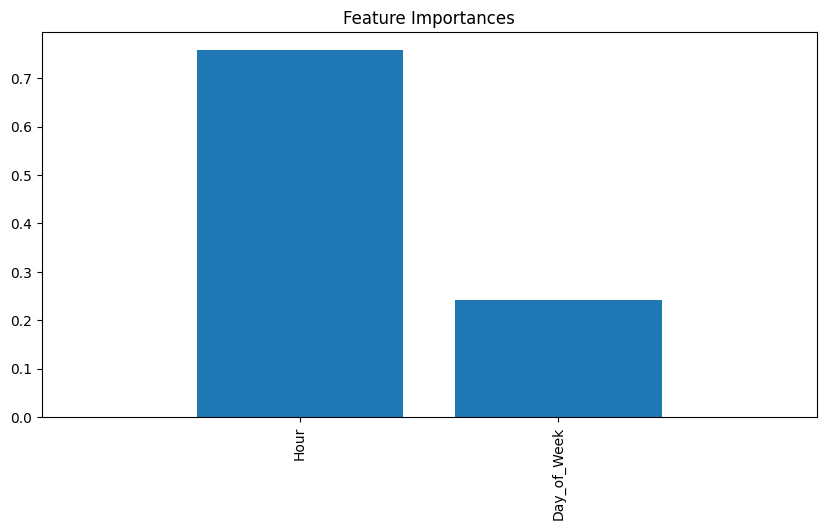

In [ ]:
import matplotlib.pyplot as plt

# Feature importance
importances = model.feature_importances_
feature_names = X.columns

# Sort the feature importances in descending order
indices = importances.argsort()[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 5))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()
